- iterate over the cells
- save hydrology and sediments
- make sure to save the ls, sc

1. Experiment 1: NO GLACIERS
2. Experiment 2: transport limited case (!!! HERE: calculate what is the mean annual sedimant yeild) 
3. Experiment 3: linear increase in sediment storage: (HOW BIG LANDSLIDE SHOULD BE?)

-- to make changes in the model go to run.py, SedCas_glacier_sed.py (model) or modules.py (modules)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


# modelling part
from run import run


# transport limited case (=sediment unlimited): calculate how much sediment there MAY be

/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang/cellnr29
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.78s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang/cellnr20
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang/cellnr19
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.85s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang/cellnr21
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.72s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang/cellnr28
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.74s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang/langtang_tl_percentiles_with_coors.csv


NotADirectoryError: [Errno 20] Not a directory: '/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang/langtang_tl_percentiles_with_coors.csv'

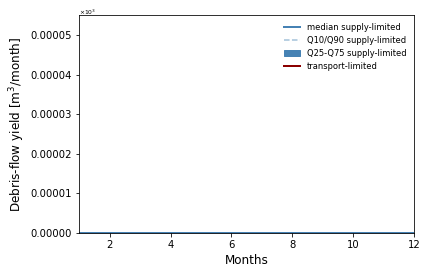

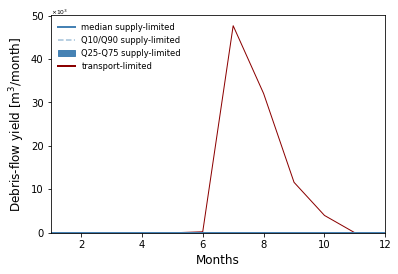

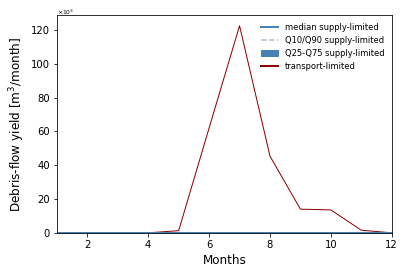

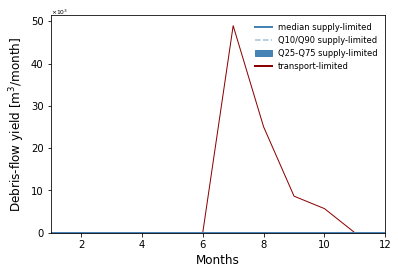

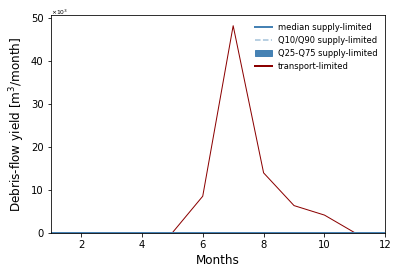

In [2]:

import os
from run import run

climatepath = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang'

# get all folders togetehr 
# ls_ = os.listdir('./langtang')
ls_ = os.listdir(climatepath)
ls = [d for d in ls_ if not d.startswith('.')]
dir0 = os.getcwd()

# run the model for each
for d in ls:
    path = os.path.join(dir0, 'langtang', d)
    print(path)
    os.chdir(path)
    run()
    os.chdir(dir0)


# how much sediment is exported per year in the transport limited case (= unlimited amount of sedoments) ?

In [ ]:
# for each output sediment folder calculate the total annual 
# go over each folder 
# take Sediment out file 
# calculate annual mean
# save into the table, where the table has: cellnr, mean annual sed yeald

In [3]:

# Define your custom function
def annual_sum_mean(df):
    df['D'] = pd.to_datetime(df['D'])
    df['Year'] = df['D'].dt.year
    annual_sum = df.groupby('Year').sum()
    annual_mean_Qstl = annual_sum.Qstl.mean()
    return annual_mean_Qstl

def annual_sum_percentile(df, percentile):
    df['D'] = pd.to_datetime(df['D'])
    df['Year'] = df['D'].dt.year
    annual_sum = df.groupby('Year').sum()
    annual_percentile_Qstl = annual_sum.Qstl.quantile(percentile / 100)
    return annual_percentile_Qstl

# def annual_sum_25percent(df):
#     df['D'] = pd.to_datetime(df['D'])
#     df['Year'] = df['D'].dt.year
#     annual_sum = df.groupby('Year').sum()
#     annual_25_Qstl = annual_sum.Qstl.quantile(0.25)
#     return annual_25_Qstl

# def annual_sum_50percent(df):
#     df['D'] = pd.to_datetime(df['D'])
#     df['Year'] = df['D'].dt.year
#     annual_sum = df.groupby('Year').sum()
#     annual_50_Qstl = annual_sum.Qstl.quantile(0.5)
#     return annual_50_Qstl

# def annual_sum_75percent(df):
#     df['D'] = pd.to_datetime(df['D'])
#     df['Year'] = df['D'].dt.year
#     annual_sum = df.groupby('Year').sum()
#     annual_50_Qstl = annual_sum.Qstl.quantile(0.5)
#     return annual_50_Qstl


In [4]:

# Path to the directory containing your folders
directory_path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang'

# an empty table to store results
mean_annual_sum = []
mean_annual_25 = []
mean_annual_50 = []
mean_annual_75 = []

# Iterate over each folder
for folder_name in os.listdir(directory_path):
    folder_path = os.path.join(directory_path, folder_name)
    
    # Check if it's a directory and its name starts with 'cellnr'
    if os.path.isdir(folder_path) and folder_name.startswith('cellnr'):
        # Locate the 'sediment.out' file within the folder
        sediment_out_path = os.path.join(folder_path, 'Sediment.out')
        
        # Read the contents of the file into a pandas DataFrame
        df = pd.read_csv(sediment_out_path, delimiter=',')  # Adjust delimiter if needed
        # mean:
        mean_annual_sum_value = annual_sum_mean(df)
        # percentiles:
        mean_annual_25_value = annual_sum_percentile(df, 25)
        mean_annual_50_value = annual_sum_percentile(df, 50)
        mean_annual_75_value = annual_sum_percentile(df, 75)

        
        # Save the DataFrame into the results table
        mean_annual_sum.append((int(folder_name.replace('cellnr', '')), mean_annual_sum_value))
        mean_annual_25.append((int(folder_name.replace('cellnr', '')), mean_annual_25_value))
        mean_annual_50.append((int(folder_name.replace('cellnr', '')), mean_annual_50_value))
        mean_annual_75.append((int(folder_name.replace('cellnr', '')), mean_annual_75_value))

# make table
mean_annual_sum_df = pd.DataFrame(mean_annual_sum, columns=['cellnr', 'annual_mean_Qstl_mm']).set_index('cellnr')
mean_annual_25_df = pd.DataFrame(mean_annual_25, columns=['cellnr', 'annual_25percent_Qstl_mm']).set_index('cellnr')#, inplace=True)
mean_annual_50_df = pd.DataFrame(mean_annual_50, columns=['cellnr', 'annual_50percent_Qstl_mm']).set_index('cellnr')#, inplace=True)
mean_annual_75_df = pd.DataFrame(mean_annual_75, columns=['cellnr', 'annual_75percent_Qstl_mm']).set_index('cellnr')#, inplace=True)

# merge together
merged_df = pd.concat([mean_annual_sum_df, mean_annual_25_df, mean_annual_50_df, mean_annual_75_df], axis=1)


In [14]:
# mean_annual_sum_df['annual_mean_Qstl_m'] = mean_annual_sum_df.annual_mean_Qstl_mm/1000     # [sediments mm to m] 
# mean_annual_sum_df['annual_mean_Qstl_m3'] = mean_annual_sum_df.annual_mean_Qstl_m * 4.83*(10**6)   # [sediments [m] * area [m2]


4.0

In [6]:
for column in merged_df.columns:
    # for the columns with _mm in it
    if '_mm' in column:
        # Replace '_mm' with '_m3' and create a new column
        new_column_name = column.replace('_mm', '_m3')
        # convert to m3: 1) [sediments mm to m] 2) [sediments [m] * area [m2]
        merged_df[new_column_name] = (merged_df[column] / 1000) * 4.83 * (10 ** 6)
                

In [15]:
merged_df

,annual_mean_Qstl_mm,annual_25percent_Qstl_mm,annual_50percent_Qstl_mm,annual_75percent_Qstl_mm,annual_mean_Qstl_m3,annual_25percent_Qstl_m3,annual_50percent_Qstl_m3,annual_75percent_Qstl_m3,annual_mean_Qstl_m3_day,annual_25percent_Qstl_m3_day,annual_50percent_Qstl_m3_day,annual_75percent_Qstl_m3_day
cellnr,,,,,,,,,,,,
29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20,38.509490,8.763829,27.317700,50.296078,186000.836294,42329.292169,131944.492915,242930.056410,509.591332,115.970663,361.491761,665.561798
19,90.675770,41.335432,71.758399,106.659055,437963.970427,199650.138758,346593.066285,515163.237608,1199.901289,546.986682,949.570045,1411.406130
21,34.943933,9.276674,24.460140,45.293979,168779.196292,44806.336017,118142.475436,218769.916272,462.408757,122.757085,323.678015,599.369634
28,34.952741,11.469149,29.613496,42.230143,168821.736872,55395.990663,143033.183766,203971.589702,462.525306,151.769837,391.871736,558.826273
12,101.077941,31.753764,69.859790,119.785020,488206.454885,153370.678632,337422.783956,578561.644486,1337.551931,420.193640,924.445983,1585.100396
23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13,117.505725,56.592778,93.680192,157.505983,567552.649360,273343.116363,452475.329131,760753.898573,1554.938765,748.885250,1239.658436,2084.257256


## m3/day

In [7]:
# Iterate over each column in the DataFrame
for column in merged_df.columns:
    if '_m3' in column:
        merged_df[column + '_day'] = merged_df[column] /365


# add coordinates and save the output 

In [8]:
# csv with coordinates and geopotential (z) 
langtang_elevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/Thesisfiles_Varya/climate/elevation/geopotential_langtang.csv').set_index('cellnr')
with_coords = pd.concat([merged_df, langtang_elevation],  axis=1).reset_index()




In [9]:
with_coords

,cellnr,annual_mean_Qstl_mm,annual_25percent_Qstl_mm,annual_50percent_Qstl_mm,annual_75percent_Qstl_mm,annual_mean_Qstl_m3,annual_25percent_Qstl_m3,annual_50percent_Qstl_m3,annual_75percent_Qstl_m3,annual_mean_Qstl_m3_day,annual_25percent_Qstl_m3_day,annual_50percent_Qstl_m3_day,annual_75percent_Qstl_m3_day,Latitude,Longitude,z
0,12,101.077941,31.753764,69.859790,119.785020,488206.454885,153370.678632,337422.783956,578561.644486,1337.551931,420.193640,924.445983,1585.100396,28.100000,85.500000,4006.004075
1,13,117.505725,56.592778,93.680192,157.505983,567552.649360,273343.116363,452475.329131,760753.898573,1554.938765,748.885250,1239.658436,2084.257256,28.100000,85.599998,4116.321887
2,14,92.665083,43.896875,75.775071,117.409753,447572.349930,212021.904893,365993.592445,567089.108772,1226.225616,580.881931,1002.722171,1553.668791,28.100000,85.699997,4106.181252
3,19,90.675770,41.335432,71.758399,106.659055,437963.970427,199650.138758,346593.066285,515163.237608,1199.901289,546.986682,949.570045,1411.406130,28.200001,85.400002,3513.107780
4,20,38.509490,8.763829,27.317700,50.296078,186000.836294,42329.292169,131944.492915,242930.056410,509.591332,115.970663,361.491761,665.561798,28.200001,85.500000,4432.013155
5,21,34.943933,9.276674,24.460140,45.293979,168779.196292,44806.336017,118142.475436,218769.916272,462.408757,122.757085,323.678015,599.369634,28.200001,85.599998,5007.775847
6,22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.200001,85.699997,5149.130146
7,23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.200001,85.800003,5078.555427
8,28,34.952741,11.469149,29.613496,42.230143,168821.736872,55395.990663,143033.183766,203971.589702,462.525306,151.769837,391.871736,558.826273,28.299999,85.500000,4167.127490
9,29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.299999,85.599998,5154.558970


In [10]:
#save alltogether 
output_path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang/'
with_coords.to_csv(output_path + 'langtang_tl_percentiles_with_coords.csv', index = False)

In [11]:
with_coords.columns

Index(['cellnr', 'annual_mean_Qstl_mm', 'annual_25percent_Qstl_mm',
       'annual_50percent_Qstl_mm', 'annual_75percent_Qstl_mm',
       'annual_mean_Qstl_m3', 'annual_25percent_Qstl_m3',
       'annual_50percent_Qstl_m3', 'annual_75percent_Qstl_m3',
       'annual_mean_Qstl_m3_day', 'annual_25percent_Qstl_m3_day',
       'annual_50percent_Qstl_m3_day', 'annual_75percent_Qstl_m3_day',
       'Latitude', 'Longitude', 'z'],
      dtype='object')

In [12]:
columns_to_copy = ['cellnr', 'annual_mean_Qstl_m3_day', 'annual_25percent_Qstl_m3_day',
                   'annual_50percent_Qstl_m3_day', 'annual_75percent_Qstl_m3_day',
                   'Latitude', 'Longitude']

selected_columns= with_coords[columns_to_copy].copy()
                              

In [13]:

selected_columns.to_csv(output_path + 'langtang_tl_percentiles_with_coords_m3_day.csv', index = False)

# test for 1 file

In [ ]:
testsed = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang/cellnr28/Sediment.out')
testsed

df = annual_sum_percentile(testsed, 25)





In [ ]:

df = testsed

df['D'] = pd.to_datetime(df['D'])
df['Year'] = df['D'].dt.year
annual_sum = df.groupby('Year').sum()


In [ ]:
plt.figure(figsize=(20,7))
plt.bar(height = annual_sum.Qstl, x = annual_sum.index, label = 'Qstl')
plt.bar(height = annual_sum.Qdftl, x = annual_sum.index, color = 'lime', alpha = 0.5, label = 'Qdstl')

# plt.bar(height = annual_sum.Q100, x = annual_sum.index, color = 'magenta', alpha = 0.5, label = 'Q100')
plt.legend()

In [ ]:
plt.figure(figsize=(20,7))
# plt.bar(height = annual_sum.Qstl, x = annual_sum.index, label = 'Qstl')
# plt.bar(height = annual_sum.Qdftl, x = annual_sum.index, color = 'lime', alpha = 0.5, label = 'Qdstl')

plt.bar(height = annual_sum.Q100, x = annual_sum.index, color = 'magenta', alpha = 0.5, label = 'Q100')
plt.legend()

In [ ]:
annual_sum.describe()

In [ ]:
# test climate input
import pandas as pd
testclimate = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang/cellnr12/climatecell.12.met')

In [ ]:
testsed = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang/cellnr28/Sediment.out')
testsed

df = testsed


df['D'] = pd.to_datetime(df['D'])
df['Year'] = df['D'].dt.year
annual_sum = df.groupby('Year').sum()
annual_mean_Qstl = annual_sum.Qstl.mean()

In [ ]:
annual_sum.Qstl.mean()

## 